# The Transformer Architecture

### Todo 
* [x] Transformer (wrapper)
* [x] Input Embedding / Output Embedding
* [x] Positional Encoding (learned)
* [x] EncoderBlock
* [x] DecoderBlock
* [x] MultiHeadAttn (Masked or not)
* [x] ScaledDotProductAttn
    - not sure about softmax dimension
    - not sure about mask
* [x] PositionWiseFeedForward
* [x] Output Layer
* [x] params file (json)


In [5]:
from transformer.model import Transformer
from transformer.utils import DEVICE

import torch
from torch import nn
import torch.nn.functional as F
from torch import optim

In [2]:
import json
with open("params.json") as params_file:
    params = json.load(params_file)
    
batch_size = params["batch_size"]
seq_len = 100

print(DEVICE)

data = torch.ones(batch_size, seq_len, dtype=torch.long).to(DEVICE)

print(data.shape)

model = Transformer(vocab_size=params["vocab_size"], 
                    d_model=params["d_model"],
                    n_layers=params["n_layers"],
                    n_heads=params["n_heads"],
                    d_ff=params["d_ff"],
                    max_length=params["max_length"]).to(DEVICE)

output = model(encoder_in=data, decoder_in=data)
print("Output :  ", output.shape)

cuda
torch.Size([32, 100])
Output :   torch.Size([32, 100, 30000])


In [6]:
def adjust_learning_rate(optimizer, d_model, step_num, warmup_steps=4000):

    lr = d_model**(-0.5) * min(step_num**(-0.5), step_num * warmup_steps**(-1.5))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [19]:
optimizer = optim.Adam(model.parameters(), lr=1e-3, betas=(params["beta_1"], params["beta_2"]), eps=params["epsilon"])

lr_list = []
for steps in range(1, 100000):
    adjust_learning_rate(optimizer, params["d_model"], steps)
    for param_group in optimizer.param_groups:
        lr_list.append(param_group["lr"])


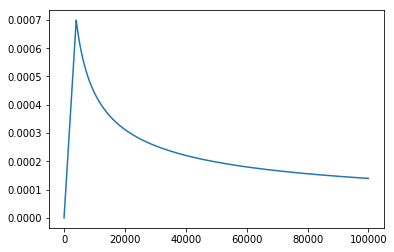

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(lr_list)
plt.show()